In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
#ratings datset
df = pd.read_csv(r'D:\intellipaat ds ai ml\DS@AI\5 ml\07-07 netflix project\svd files self/ratings.csv', usecols=[0,1,2])
df.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [130]:
#movies dataset
df_m= pd.read_csv(r'D:\intellipaat ds ai ml\DS@AI\5 ml\07-07 netflix project\svd files self/movies.csv', usecols = [0,1,2])
df_m.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   userId   1048575 non-null  int64  
 1   movieId  1048575 non-null  int64  
 2   rating   1048575 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 24.0 MB


In [133]:
df.duplicated().sum()

0

In [134]:
user_count = df.userId.nunique()
user_count

7120

In [135]:
movie_count = df.movieId.nunique()
movie_count

14026

In [136]:
rating_list = df.rating.unique()
rating_list

array([3.5, 4. , 3. , 4.5, 5. , 2. , 1. , 2.5, 0.5, 1.5])

In [137]:
rating_count = df.rating.count()
rating_count

1048575

In [138]:
p = df.groupby('rating')['rating'].agg(['count']).reset_index()
p

,rating,count
0,0.5,13232
1,1.0,35144
2,1.5,14029
3,2.0,74706
4,2.5,44791
5,3.0,226202
6,3.5,112926
7,4.0,295135
8,4.5,79848
9,5.0,152562


Total pool: 14026 Movies, 7120 customers, 1048575 ratings given


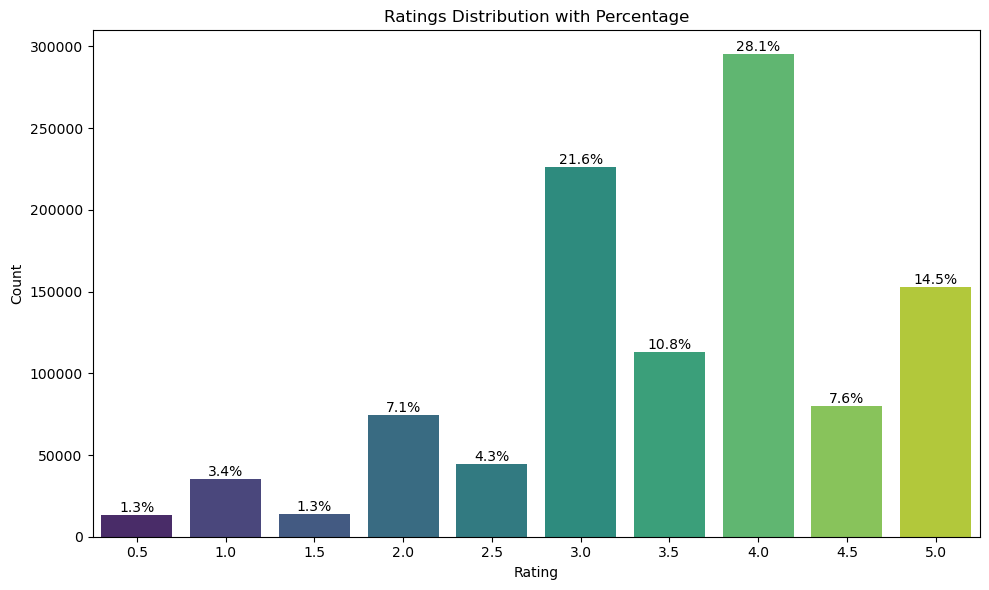

In [139]:
total = p['count'].sum()
p['perc'] = (p['count']/total*100).round(1)
plt.figure(figsize = (10,6))
ax = sns.barplot(x = 'rating',y='count',data= p, palette = 'viridis')

for i in ax.containers:
    ax.bar_label(i, labels = [f'{val}%' for val in p['perc']],label_type = 'edge', fontsize = 10)
print(f'Total pool: {movie_count} Movies, {user_count} customers, {rating_count} ratings given')
plt.title('Ratings Distribution with Percentage')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.tight_layout()
plt.show()
    

# Data Cleaning

In [140]:
df_user_summary = df.groupby('userId')['rating'].agg(['count'])

In [141]:
df_user_summary

,count
userId,
1,175
2,61
3,187
4,28
5,66
...,...
7116,232
7117,188
7118,40


In [154]:
#To create a list of all the inactive users(users who rate less often)
df_user_summary.index = df_user_summary.index.map(int)
user_benchmark = round(df_user_summary['count'].quantile(.7),0)
user_drop= df_user_summary[df_user_summary['count']<user_benchmark].index #drop user who rate less often
print(f'User review count threshold:{user_benchmark}')


User review count threshold:131.0


In [155]:
#To create a list of all the movies rated less often(only include top 30% rated movies)
df_movie_summary = df.groupby('movieId')['rating'].agg(['count'])
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(.7),0)
movie_drop= df_movie_summary[df_movie_summary['count']<movie_benchmark].index  #drop movies rated less often
print(f' movie review count threshold:{movie_benchmark}')

 movie review count threshold:163.0


In [156]:
# remove least rated user and movie id for data cleaning
df = df[~df['userId'].isin(user_drop)]

In [157]:
df = df[~df['movieId'].isin(movie_drop)]

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516581 entries, 0 to 1048464
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   516581 non-null  int64  
 1   movieId  516581 non-null  int64  
 2   rating   516581 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 15.8 MB


In [159]:
#ratings matix
df_pivot = pd.pivot(df, index = 'userId',columns = 'movieId',values = 'rating').fillna(0) # use pivot or pivot_table
df_pivot

movieId,1,2,3,5,6,7,10,11,16,17,...,74458,76093,76251,77561,78499,79132,80463,81591,81845,91529
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,3.0,0.0,0.0,3.0,0.0,4.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,4.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,4.5,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7105,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7107,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7110,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
from surprise import SVD, Reader, Dataset
from surprise.model_selection import cross_validate

In [163]:
reader = Reader()
svd = SVD()
data = Dataset.load_from_df(df[['userId','movieId','rating']],reader)
cross_validate(svd, data, measures = ['RMSE','MAE'], cv = 3,verbose= True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8019  0.8021  0.8028  0.8022  0.0004  
MAE (testset)     0.6124  0.6133  0.6136  0.6131  0.0005  
Fit time          9.36    9.67    9.21    9.41    0.19    
Test time         4.08    4.37    3.84    4.10    0.22    


{'test_rmse': array([0.80185388, 0.80208328, 0.80275952]),
 'test_mae': array([0.61244521, 0.61329924, 0.6136413 ]),
 'fit_time': (9.36423635482788, 9.668057680130005, 9.210332155227661),
 'test_time': (4.080490350723267, 4.371308326721191, 3.841637134552002)}

In [167]:
# To find all the movies rated as 5 stars by user with userId = 7105
user_7105 = df[(df['userId']==7105) & (df['rating']==5)]
user_7105.head()

,userId,movieId,rating
1046975,7105,34,5.0
1046978,7105,260,5.0
1046983,7105,357,5.0
1046989,7105,541,5.0
1046995,7105,858,5.0


In [168]:
user_7105 = user_7105.set_index('movieId')
user_7105.head()

,userId,rating
movieId,,
34,7105,5.0
260,7105,5.0
357,7105,5.0
541,7105,5.0
858,7105,5.0


In [165]:
user_7105 = user_7105.join(df_m['title'])

In [166]:
user_7105

,userId,rating,title
movieId,,,
34,7105,5.0,Carrington (1995)
260,7105,5.0,Ladybird Ladybird (1994)
357,7105,5.0,It Could Happen to You (1994)
541,7105,5.0,Harem (1985)
858,7105,5.0,Killer: A Journal of Murder (1995)
965,7105,5.0,Madagascar Skin (1995)
1036,7105,5.0,Jude (1996)
1079,7105,5.0,Top Gun (1986)
1136,7105,5.0,Love in Bloom (1935)


In [181]:
# Train an SVD to predict ratings for user with userId = 7105
# Create a shallow copy for the movies dataset
user_7105 = df_m.copy()

In [182]:
user_7105

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [183]:
user_7105_rated_movies = df[df['userId'] == 7105]['movieId'].unique()
user_7105_rated_movies

array([  10,   11,   17,   34,  125,  223,  260,  300,  316,  349,  356,
        357,  380,  457,  480,  539,  541,  555,  589,  590,  733,  745,
        858,  902,  905,  913,  965,  969, 1036, 1079, 1090, 1127, 1129,
       1136, 1148, 1175, 1196, 1197, 1198, 1199, 1200, 1201, 1204, 1210,
       1224, 1227, 1240, 1242, 1243, 1248, 1259, 1265, 1270, 1272, 1275,
       1277, 1287, 1288, 1291, 1303, 1304, 1356, 1374, 1376, 1387, 1394,
       1408, 1485, 1513, 1580, 1641, 1674, 1721, 1722, 1747, 1912, 1923,
       1953, 1954, 1968, 2000, 2006, 2028, 2167, 2243, 2318, 2324, 2396,
       2406, 2427, 2431, 2470, 2490, 2542, 2571, 2599, 2617, 2628, 2640,
       2657, 2683, 2706, 2716, 2735, 2739, 2762, 2763, 2770, 2788, 2826,
       2858, 2871, 2872, 2890, 2916, 2918, 2951, 2959, 2985, 2989, 2990,
       2991, 2997, 3060], dtype=int64)

In [184]:
# to estimate predicted score only for unrated movies
user_7105_unrated_movies = user_7105[~user_7105['movieId'].isin(user_7105_rated_movies)]
user_7105_unrated_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [185]:
# removing rarely rated movies also
user_7105_unrated_movies = user_7105_unrated_movies[~user_7105_unrated_movies['movieId'].isin(movie_drop)].reset_index(drop = True)

In [186]:
user_7105_unrated_movies 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
24183,131254,Kein Bund für's Leben (2007),Comedy
24184,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
24185,131258,The Pirates (2014),Adventure
24186,131260,Rentun Ruusu (2001),(no genres listed)


In [187]:
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']],reader) # keep the order of columns same as df
#create a training set for svd   **** very imp -- this step should be done after cross validate only
trainset = data.build_full_trainset()
svd.fit(trainset)
user_7105_unrated_movies['score'] = user_7105_unrated_movies['movieId'].apply(lambda x: svd.predict(7105,x).est)  #estimate for unrated movie 


In [189]:
user_7105_unrated_movies = user_7105_unrated_movies.drop(['movieId','genres'],axis = 1)

In [190]:
user_7105_unrated_movies = user_7105_unrated_movies.sort_values(by = 'score', ascending = False)

In [191]:
user_7105_unrated_movies # top rated movies

,title,score
1132,On the Waterfront (1954),4.815995
697,One Flew Over the Cuckoo's Nest (1975),4.812759
700,To Kill a Mockingbird (1962),4.729849
728,Chinatown (1974),4.659944
527,Casablanca (1942),4.655326
...,...,...
1543,Wild Wild West (1999),1.700337
905,Speed 2: Cruise Control (1997),1.635390
94,Judge Dredd (1995),1.344137
289,Super Mario Bros. (1993),1.258348


# create a user defined function to get top N movies predicted


In [193]:
# create a user defined function to get top N movies predicted

data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
svd.fit(trainset)



In [203]:
def get_top_n_recommendations(user_id, movies_df, n):
    user_movies = movies_df.copy() #shallow copy for the movies dataset
    user_rated_movies = df[df['userId'] == user_id]['movieId'].unique() #pick rated movie id
    user_unrated_movies = user_movies[~user_movies['movieId'].isin(user_rated_movies)]# pick unrated movies
    user_unrated_movies = user_unrated_movies[~user_unrated_movies['movieId'].isin(movie_drop)].reset_index(drop = True)# removing rarely rated movies also
    user_unrated_movies['Estimated_score'] = user_unrated_movies['movieId'].apply(lambda x: svd.predict(user_id,x).est)  #estimate predicted score for unrated movie 
    user_unrated_movies = user_unrated_movies.drop(['movieId','genres'],axis = 1, errors ='ignore')
    top_n = user_unrated_movies.sort_values(by = 'Estimated_score', ascending = False).head(n)
    return top_n[['title', 'Estimated_score']] 
   


In [207]:
user_5 = get_top_n_recommendations(5,df_m, 10)

In [208]:
user_5

,title,Estimated_score
182,"Shawshank Redemption, The (1994)",4.405604
29,"Usual Suspects, The (1995)",4.337259
516,"Godfather, The (1972)",4.284877
294,Schindler's List (1993),4.279646
8473,"Lives of Others, The (Das leben der Anderen) (...",4.255686
166,Pulp Fiction (1994),4.223030
733,One Flew Over the Cuckoo's Nest (1975),4.206973
736,Raiders of the Lost Ark (Indiana Jones and the...,4.205138
546,Rear Window (1954),4.203757
740,12 Angry Men (1957),4.194626
